In [1]:
# Cargar y preprocesar los datos de entrada
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz
from IPython.display import display

In [3]:
# Cargar el archivo CSV con los datos de setas
csv_path = '/content/drive/MyDrive/Visión por computador/Hongos/Mushrooms classification/mushrooms.csv'
data = pd.read_csv(csv_path)

In [4]:
# Convertir las columnas categóricas a valores numéricos
encoder = LabelEncoder()
for col in data.columns:
    data[col] = encoder.fit_transform(data[col])


In [5]:
# Separar las características y la variable objetivo
features = data.drop('class', axis=1)
target = data['class']

In [6]:
# Dividir los datos en conjuntos de entrenamiento y prueba
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [7]:
# Entrenar el modelo de árbol de decisión
model = DecisionTreeClassifier()
model.fit(features_train, target_train)

DecisionTreeClassifier()

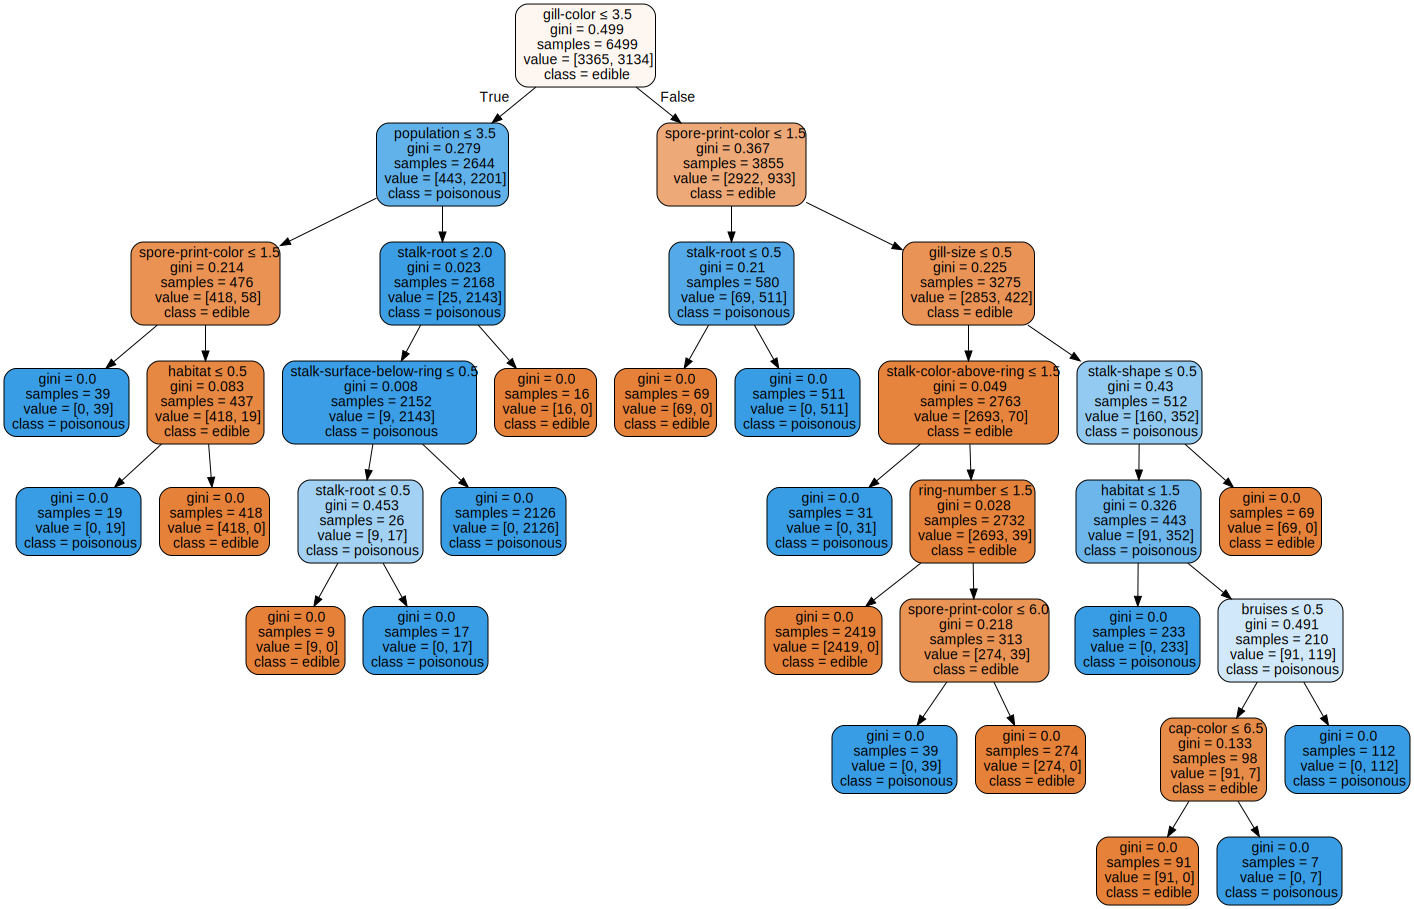

In [8]:
#  Visualizar el árbol de decisión utilizando graphviz
dot_data = tree.export_graphviz(model, out_file=None,
                                feature_names=features.columns,
                                class_names=['edible', 'poisonous'],
                                filled=True, rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
display(graph)

In [9]:
# Evaluar el rendimiento del modelo
model_accuracy = model.score(features_test, target_test)
print(f'Precisión: {model_accuracy:.2f}')


Precisión: 1.00
